<a href="https://colab.research.google.com/github/yucaret/Data_Analysis/blob/main/Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data upload

In [ ]:
import requests
import pandas as pd
import numpy as np
from io import BytesIO
from bs4 import BeautifulSoup

url = "https://www.cityobservatory.birmingham.gov.uk/@birmingham-city-council/purchase-card-transactions"  # Replace with the actual URL of the webpage
response = requests.get(url)

df_purchase = pd.DataFrame()

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Assuming the download links have a specific class, adjust it accordingly
    #download_links = soup.select('.buttons a[href$=".xls"]')
    download_links = soup.find_all('a', string = 'Download')

    for link in download_links:
        file_name = link['href'].split('/')[-1]  # Extracting the file name from the URL
        file_url = link['href']
        if (('2021' in file_name) #or
         #('22' in file_name)
          #or ('23' in file_name)
          ):
          print(str(link))
          print(f"File Name: {file_name}, File URL: {file_url}")
          print('----------------')

          # Descargar el archivo Excel
          response_2 = requests.get(file_url)
          archivo_excel = BytesIO(response_2.content)

          # Leer el archivo Excel en un DataFrame de pandas
          df = pd.read_excel(archivo_excel)

          new_columns = []

          for column in df.columns:
            #if(column.upper() == 'DIRECTORATES'):
            #  column = 'DIRECTORATE'
            #if(column.upper() == 'BILLING CUR CODE.1'):
            #  column = 'BILLING CUR CODE'
            new_columns.append(column.upper())

          df.columns = new_columns

          if (df_purchase.empty):
            df_purchase = df.copy()
            print('si')
          else:
            df_purchase = pd.concat([df_purchase, df], ignore_index=True)
            print('no')

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

<a class="py-1 px-6 ml-2 bg-blue-c-600 rounded-lg" href="https://birmingham-city-observatory.datopian.com/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/a3c3f231-abb4-400a-82be-0ede4a71c763/download/purchase-card-transactions-january-2021.xls" rel="noreferrer" target="_blank">Download</a>
File Name: purchase-card-transactions-january-2021.xls, File URL: https://birmingham-city-observatory.datopian.com/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/a3c3f231-abb4-400a-82be-0ede4a71c763/download/purchase-card-transactions-january-2021.xls
----------------
si
<a class="py-1 px-6 ml-2 bg-blue-c-600 rounded-lg" href="https://birmingham-city-observatory.datopian.com/dataset/cf552d08-cee9-43bf-8c0f-3196a9311799/resource/490c0a7f-23c5-4520-a1e8-4bb1cd8aaa20/download/purchase-card-transactions-february-2021.xls" rel="noreferrer" target="_blank">Download</a>
File Name: purchase-card-transactions-february-2021.xls, File URL: https://birmingham-city-observatory.datopian.com/dataset/cf

In [ ]:
df_purchase.shape

(41640, 20)

In [ ]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TRANS DATE              41640 non-null  datetime64[ns]
 1   TRANS TAX DESC          40989 non-null  object        
 2   ORIGINAL GROSS AMT      41640 non-null  float64       
 3   ORIGINAL CUR            41640 non-null  object        
 4   BILLING GROSS AMT       39573 non-null  float64       
 5   BILLING CUR CODE        41640 non-null  object        
 6   MERCHANT NAME           41639 non-null  object        
 7   CARD NUMBER             41640 non-null  object        
 8   TRANS CAC CODE 1        41459 non-null  object        
 9   TRANS CAC DESC 1        41459 non-null  object        
 10  TRANS CAC CODE 2        41311 non-null  object        
 11  TRANS CAC DESC 2        41311 non-null  object        
 12  TRANS CAC CODE 3        39076 non-null  object

In [ ]:
df_purchase = df_purchase[[
'TRANS DATE',
'TRANS TAX DESC',
'ORIGINAL GROSS AMT',
'ORIGINAL CUR',
'BILLING CUR CODE',
'BILLING GROSS AMT',
'MERCHANT NAME',
'CARD NUMBER',
'TRANS CAC CODE 1',
'TRANS CAC CODE 2',
'TRANS CAC CODE 3',
'DIRECTORATE',
'TRANS TAX RATE',
'TRANS TAX AMT',
'TRANS ORIGINAL NET AMT',
'MERCHANT TAX REG NO',
'MCC CODE'
]]

# Data Transformation and Exploration

In [ ]:
#df_purchase['NUMERO DEL DIA'] = df_purchase['TRANS DATE'].dt.dayofweek
df_purchase['NUMERO DEL DIA'] = df_purchase['TRANS DATE'].dt.day_name()
df_purchase['NUMERO DEL MES'] = df_purchase['TRANS DATE'].dt.month_name()

<ipython-input-35-a2aa14959301>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['NUMERO DEL DIA'] = df_purchase['TRANS DATE'].dt.day_name()
<ipython-input-35-a2aa14959301>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['NUMERO DEL MES'] = df_purchase['TRANS DATE'].dt.month_name()


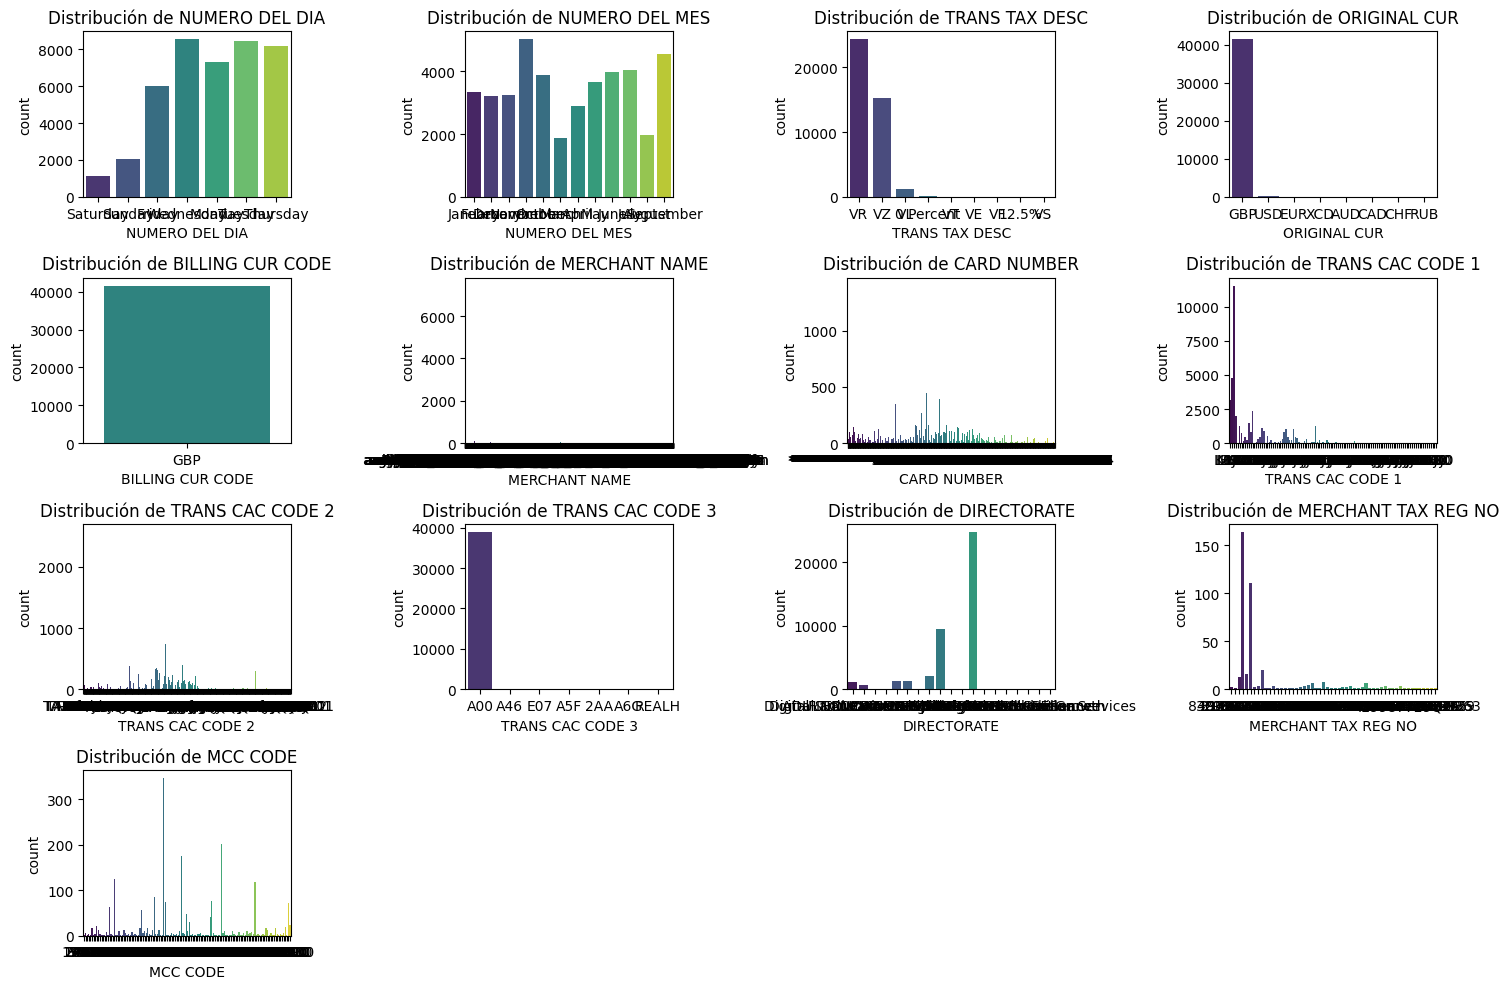

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['NUMERO DEL DIA',
'NUMERO DEL MES',
'TRANS TAX DESC',
#'ORIGINAL GROSS AMT',
'ORIGINAL CUR',
'BILLING CUR CODE',
#'BILLING GROSS AMT',
'MERCHANT NAME',
'CARD NUMBER',
'TRANS CAC CODE 1',
'TRANS CAC CODE 2',
'TRANS CAC CODE 3',
'DIRECTORATE',
#'TRANS TAX RATE',
#'TRANS TAX AMT',
#'TRANS ORIGINAL NET AMT',
'MERCHANT TAX REG NO',
'MCC CODE']

# Establecer el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear subgráficos para cada columna cualitativa
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df_purchase, palette='viridis')
    plt.title(f'Distribución de {column}')

# Ajustar el diseño del gráfico
plt.tight_layout()
plt.show()


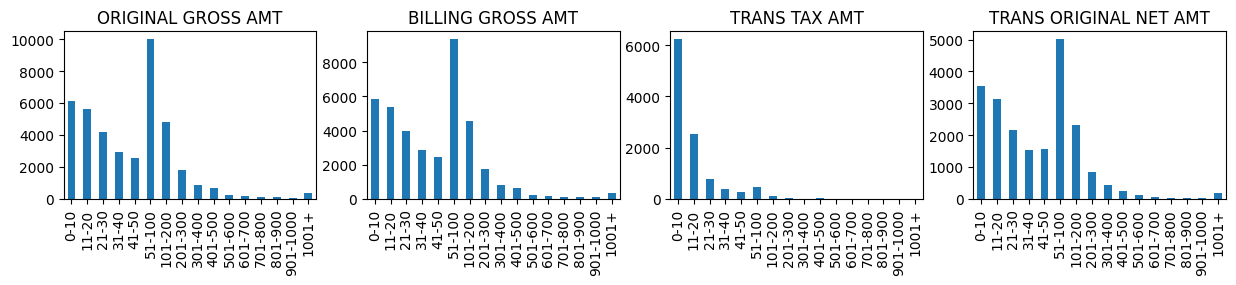

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_columns = ['ORIGINAL GROSS AMT', 'BILLING GROSS AMT', 'TRANS TAX AMT', 'TRANS ORIGINAL NET AMT']

df_purchase_range = df_purchase[categorical_columns].copy()

# Define los rangos y nombres de las etiquetas
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]  # Define tus propios rangos
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001+']

for categorical_column in categorical_columns:
  df_purchase_range[categorical_column + ' Range'] = pd.cut(df_purchase_range[categorical_column], bins=bins, labels=labels)

# Establecer el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Visualiza las frecuencias de los rangos
for i, categorical_column in enumerate(categorical_columns):
  plt.subplot(4, 4, i+1)
  df_purchase_range[categorical_column + ' Range'].value_counts().sort_index().plot(kind='bar')
  plt.title(categorical_column)
plt.show()

df_purchase_range = df_purchase_range.drop(columns = categorical_columns)

In [ ]:
df_purchase_range.head()

,ORIGINAL GROSS AMT Range,BILLING GROSS AMT Range,TRANS TAX AMT Range,TRANS ORIGINAL NET AMT Range
0,21-30,21-30,NaN,NaN
1,11-20,11-20,NaN,NaN
2,41-50,41-50,NaN,NaN
3,51-100,51-100,NaN,NaN
4,31-40,31-40,NaN,NaN


In [ ]:
# Crear variables dummy con manejo de nulos
df_dummies_2 = pd.get_dummies(df_purchase_range, dummy_na=True)

In [ ]:
df_dummies_2.head(10)

,ORIGINAL GROSS AMT Range_0-10,ORIGINAL GROSS AMT Range_11-20,ORIGINAL GROSS AMT Range_21-30,ORIGINAL GROSS AMT Range_31-40,ORIGINAL GROSS AMT Range_41-50,ORIGINAL GROSS AMT Range_51-100,ORIGINAL GROSS AMT Range_101-200,ORIGINAL GROSS AMT Range_201-300,ORIGINAL GROSS AMT Range_301-400,ORIGINAL GROSS AMT Range_401-500,...,TRANS ORIGINAL NET AMT Range_201-300,TRANS ORIGINAL NET AMT Range_301-400,TRANS ORIGINAL NET AMT Range_401-500,TRANS ORIGINAL NET AMT Range_501-600,TRANS ORIGINAL NET AMT Range_601-700,TRANS ORIGINAL NET AMT Range_701-800,TRANS ORIGINAL NET AMT Range_801-900,TRANS ORIGINAL NET AMT Range_901-1000,TRANS ORIGINAL NET AMT Range_1001+,TRANS ORIGINAL NET AMT Range_nan
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Seleccionar las columnas cualitativas
categorical_columns = ['NUMERO DEL DIA',
'NUMERO DEL MES',
'TRANS TAX DESC',
##'ORIGINAL GROSS AMT',
'ORIGINAL CUR',
'BILLING CUR CODE',
##'BILLING GROSS AMT',
#'MERCHANT NAME',
#'CARD NUMBER',
'TRANS CAC CODE 1',
'TRANS CAC CODE 2',
'TRANS CAC CODE 3',
'DIRECTORATE',
#'TRANS TAX RATE',
#'TRANS TAX AMT',
#'TRANS ORIGINAL NET AMT',
'MERCHANT TAX REG NO',
'MCC CODE'
]

df_purchase['TRANS CAC CODE 1'] = df_purchase['TRANS CAC CODE 1'].astype(str)
df_purchase['TRANS CAC CODE 2'] = df_purchase['TRANS CAC CODE 2'].astype(str)
df_purchase['TRANS CAC CODE 3'] = df_purchase['TRANS CAC CODE 3'].astype(str)
df_purchase['MCC CODE'] = df_purchase['MCC CODE'].fillna(-1).astype(str)

# Crear variables dummy con manejo de nulos
df_dummies = pd.get_dummies(df_purchase[categorical_columns], dummy_na=True)

In [ ]:
df_dummies.head()

,NUMERO DEL DIA_Friday,NUMERO DEL DIA_Monday,NUMERO DEL DIA_Saturday,NUMERO DEL DIA_Sunday,NUMERO DEL DIA_Thursday,NUMERO DEL DIA_Tuesday,NUMERO DEL DIA_Wednesday,NUMERO DEL DIA_nan,NUMERO DEL MES_April,NUMERO DEL MES_August,...,MCC CODE_8641.0,MCC CODE_8699.0,MCC CODE_8931.0,MCC CODE_8999.0,MCC CODE_9222.0,MCC CODE_9311.0,MCC CODE_9399.0,MCC CODE_9402.0,MCC CODE_nan,MCC CODE_nan
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Concatenar las variables dummy al DataFrame original y eliminar las columnas originales
df_purchase_wd = pd.concat([df_dummies, df_dummies_2], axis=1)

In [ ]:
df_purchase_wd.shape

(41640, 1097)

# Data Visualization

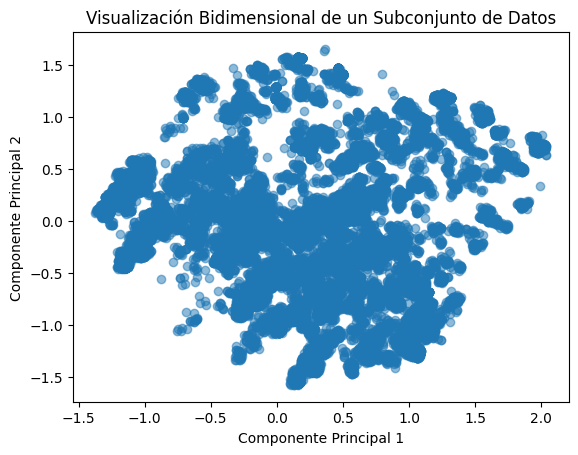

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)

# Transformar el subconjunto con PCA
componentes_principales = pca.fit_transform(df_purchase_wd.fillna(0).to_numpy())

# Visualización en un gráfico bidimensional
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], alpha=0.5)
plt.title('Visualización Bidimensional de un Subconjunto de Datos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def plot_analisis_codo_silueta(data_compoenente, clusters_maximos):

  if(clusters_maximos < 1):
    clusters_maximos = 2

  # Lista para almacenar los valores de inercia (codo) y silueta para cada número de clusters
  inertia_values = []
  silhouette_scores = []

  # Rango de números de clusters que deseas probar
  cluster_range = list(range(2, clusters_maximos + 1))

  for n_clusters in cluster_range:
      # Ajusta el modelo K-means
      print("n_clusters: " + str(n_clusters))
      kmeans = KMeans(n_clusters=n_clusters, n_init=100)
      kmeans.fit(data_compoenente)

      ## Calcula la inercia (codo) y el score de silueta
      inertia_values.append(kmeans.inertia_)
      silhouette_scores.append(silhouette_score(data_compoenente, kmeans.labels_))

  # Gráfico del método del codo
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
  plt.xlabel('Número de Clusters')
  plt.ylabel('Inercia')
  plt.title('Método del Codo')

  # Gráfico del método de la silueta
  plt.subplot(1, 2, 2)
  plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
  plt.xlabel('Número de Clusters')
  plt.ylabel('Puntuación de Silueta')
  plt.title('Método de la Silueta')

  plt.tight_layout()
  plt.show()

n_clusters: 2
n_clusters: 3
n_clusters: 4
n_clusters: 5
n_clusters: 6
n_clusters: 7
n_clusters: 8
n_clusters: 9
n_clusters: 10
n_clusters: 11
n_clusters: 12
n_clusters: 13
n_clusters: 14
n_clusters: 15
n_clusters: 16
n_clusters: 17
n_clusters: 18
n_clusters: 19
n_clusters: 20
n_clusters: 21
n_clusters: 22
n_clusters: 23
n_clusters: 24
n_clusters: 25
n_clusters: 26
n_clusters: 27
n_clusters: 28
n_clusters: 29
n_clusters: 30
n_clusters: 31
n_clusters: 32
n_clusters: 33
n_clusters: 34
n_clusters: 35
n_clusters: 36
n_clusters: 37
n_clusters: 38
n_clusters: 39
n_clusters: 40
n_clusters: 41
n_clusters: 42
n_clusters: 43
n_clusters: 44
n_clusters: 45
n_clusters: 46
n_clusters: 47
n_clusters: 48
n_clusters: 49
n_clusters: 50
n_clusters: 51
n_clusters: 52
n_clusters: 53
n_clusters: 54
n_clusters: 55
n_clusters: 56
n_clusters: 57
n_clusters: 58
n_clusters: 59
n_clusters: 60
n_clusters: 61
n_clusters: 62
n_clusters: 63
n_clusters: 64
n_clusters: 65
n_clusters: 66
n_clusters: 67
n_clusters: 68
n_c

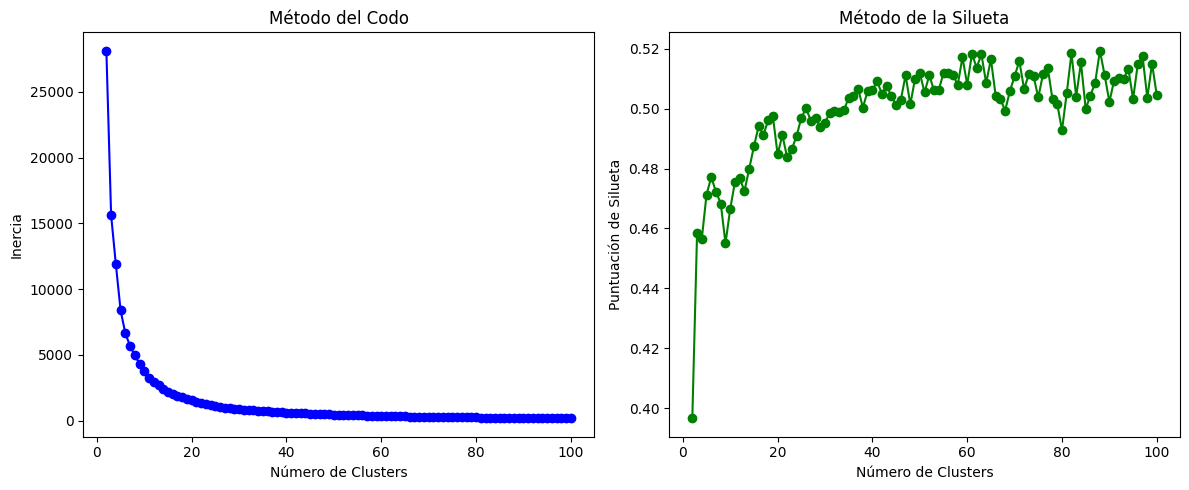

In [ ]:
plot_analisis_codo_silueta(componentes_principales, 100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


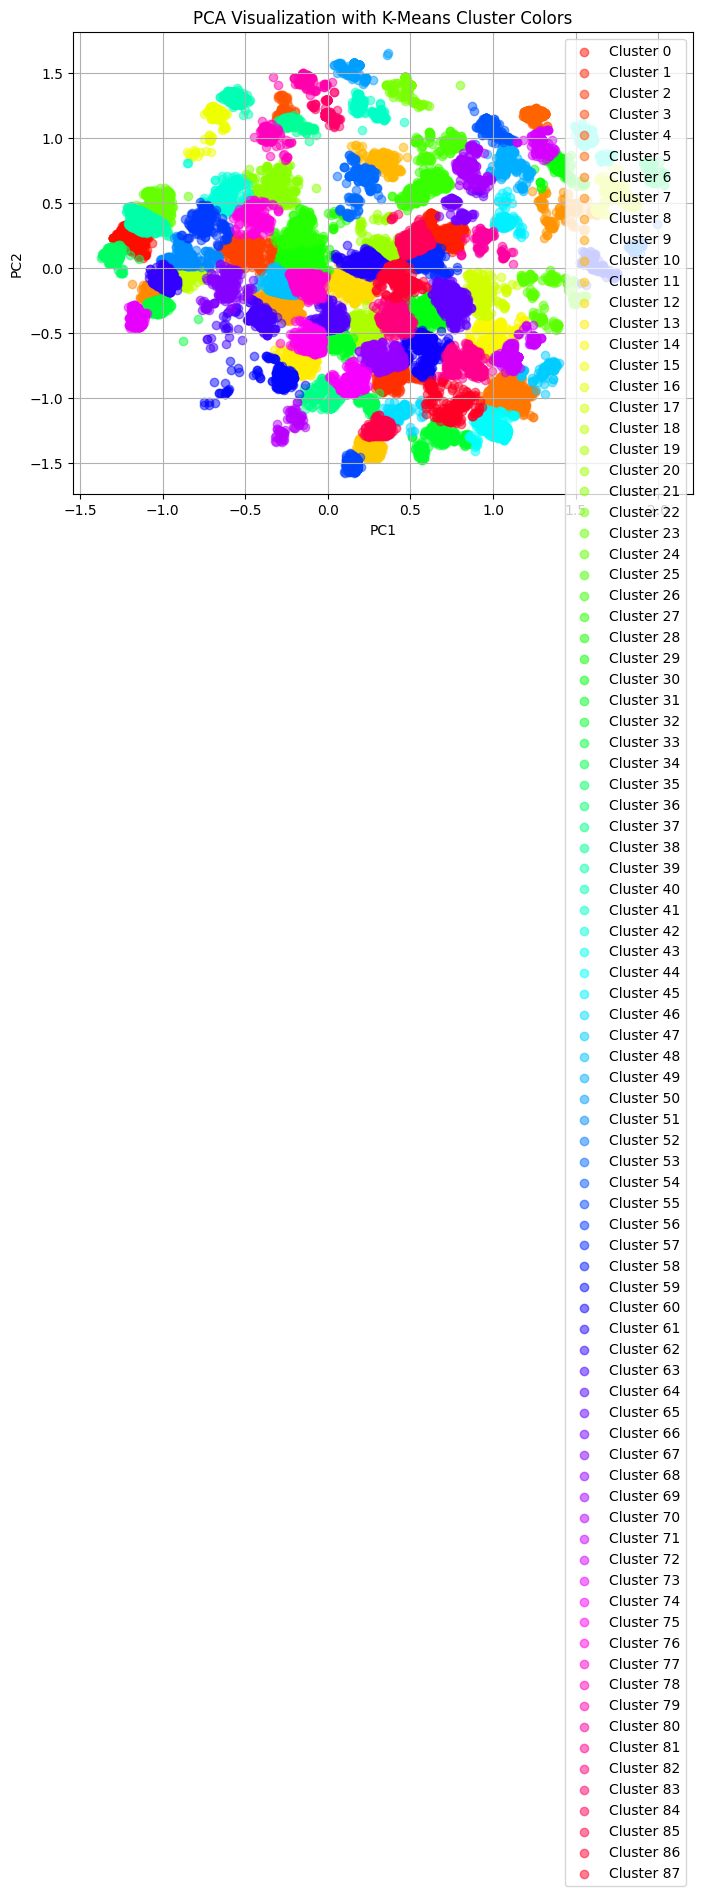

In [ ]:
n_clusters = 88

PC_variable = componentes_principales.copy()
ds = pd.DataFrame(data = PC_variable, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters = n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(PC_variable)
ds['Cluster'] = cluster_labels

# Define a color palette with as many colors as there are clusters
color_palette = sns.color_palette("hsv", n_clusters)

# Create a scatterplot of the PCA results with colors representing clusters
plt.figure(figsize=(8, 6))

for cluster in range(n_clusters):
    cluster_data = ds[ds['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], alpha=0.5, label=f'Cluster {cluster}', color=color_palette[cluster])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization with K-Means Cluster Colors')
plt.legend()
plt.grid(True)
plt.show()

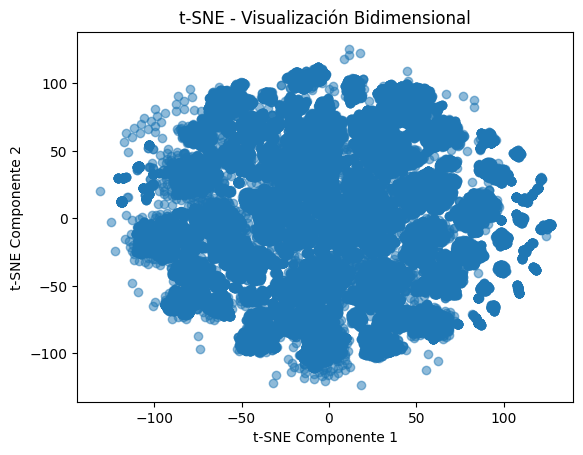

In [ ]:
from sklearn.manifold import TSNE

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
componentes_tsne = tsne.fit_transform(df_purchase_wd.fillna(0).to_numpy())

# Visualización en gráfico bidimensional (t-SNE)
plt.scatter(componentes_tsne[:, 0], componentes_tsne[:, 1], alpha=0.5)
plt.title('t-SNE - Visualización Bidimensional')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.show()

component = 3
component = 5
component = 10
component = 15
component = 20
component = 50
component = 100


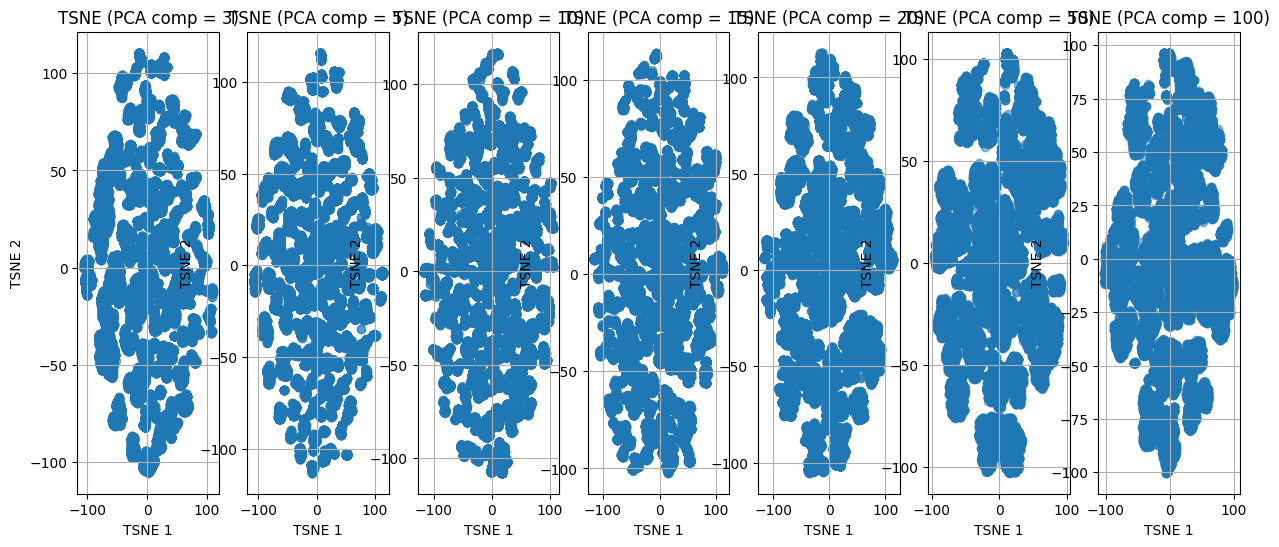

In [ ]:
from sklearn.manifold import TSNE

list_n_components = [3, 5, 10, 15, 20, 50, 100]

plt.figure(figsize=(15, 6))

array_purchase_wd = df_purchase_wd.fillna(0).to_numpy().copy()

#for n_c in list_n_components:
for i, n_c in enumerate(list_n_components):
  print('component = ' + str(n_c))

  pca = PCA(n_components = n_c)
  data_componente = pca.fit_transform(array_purchase_wd)

  # Initialize and fit a t-SNE model with perplexity=40 on the PCA-transformed data
  tsne = TSNE(n_components = 2, perplexity = 100 )
  tsne_results = tsne.fit_transform(data_componente)

  tsne_df = pd.DataFrame(data= tsne_results, columns=['tsne_1', 'tsne_2'])

  # Crear un diagrama de dispersión de las proyecciones en los dos componentes principales
  #plt.figure(figsize=(8, 6))
  plt.subplot(1, len(list_n_components), i + 1)
  plt.scatter(tsne_df['tsne_1'], tsne_df['tsne_2'], alpha=0.5)
  plt.xlabel('TSNE 1')
  plt.ylabel('TSNE 2')
  plt.title('TSNE (PCA comp = ' + str(n_c)  + ')')
  plt.grid(True)

plt.show()